In [2]:
import numpy as np
from plind.plmodel import plmodel
import matplotlib.pyplot as plt

eps = np.finfo(float).eps

In [3]:
%matplotlib notebook

In [4]:
# Parameters
def expfun(x, y):
    return 1j*(0.5*(x-y)**2 + 1/(1+x**2))

start_time = 0.0
end_time = 0.4
Npts = 100
Nint = 1000
init_contour = np.exp(1j*0)*(1/np.tan(np.linspace(2*np.pi, eps, Npts, endpoint=False)/2) + 0.0j)

In [5]:
expargs = [0.3]
plind = plmodel(init_contour, expfun, expargs=expargs)
ims = np.roots([1, -plind.expargs[0], 2, -2*plind.expargs[0], -1, -plind.expargs[0]])
caustics = np.roots([1, 0, 3, 0, 9, 0, -1])
print(ims)
print(caustics)

[ 0.04349214+1.54931432j  0.04349214-1.54931432j  0.86571321+0.j
 -0.32634874+0.19429331j -0.32634874-0.19429331j]
[-0.86643222+1.51798504j -0.86643222-1.51798504j  0.86643222+1.51798504j
  0.86643222-1.51798504j -0.32733403+0.j          0.32733403+0.j        ]


In [6]:
plind.descend(start_time, end_time)
print(plind.solution.sget_message())

The solver successfully reached the end of the integration interval.


<IPython.core.display.Javascript object>


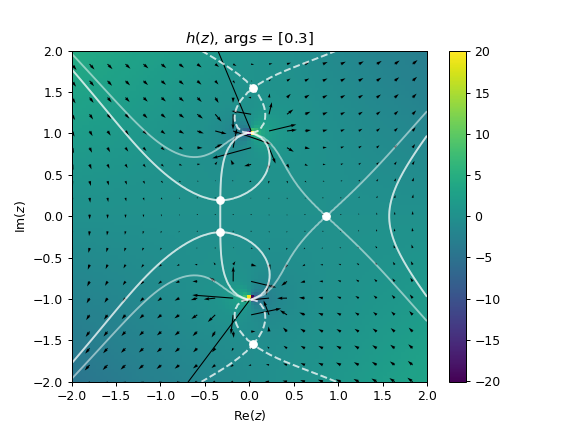

In [7]:
# Plot stuff
morsefun = plind.get_morse()
critpts = ims
gradh = plind.get_grad()

domain = [-2, 2]
N = 100
U = np.linspace(domain[0], domain[1], N)
V = np.linspace(domain[0], domain[1], N)
U, V = np.meshgrid(U, V, indexing='ij')
Z = U + 1j*V

fig, ax = plt.subplots()
ax.set_title('$h(z)$, $\\args$ = {}'.format(expargs))
ax.set_xlabel("Re($z$)")
ax.set_ylabel("Im($z$)")
ax.set_ylim(domain[0], domain[1])
ax.set_xlim(domain[0], domain[1])
# Plot h
im = ax.pcolormesh(U, V, morsefun(Z, *expargs).real)
fig.colorbar(im, ax=ax)
for p0 in critpts:
        # Plot critical points
        ax.scatter(p0.real, p0.imag, color='w')
        # Plot contours of expfun.imag passing through p0, p1
        ax.contour(U, V, expfun(Z, *expargs).imag, [expfun(p0, *expargs).imag], colors='w', alpha=0.5)
    
# Plot gradient
dn = 5
ax.quiver(U[::dn, ::dn], V[::dn, ::dn], gradh(Z[::dn, ::dn], *expargs).real, gradh(Z[::dn, ::dn], *expargs).imag, scale=140, color='k')

# Plot contours
#trajectory = plind.get_trajectory()
#line = plind.contour

#for k in np.linspace(0, trajectory.shape[0], trajectory.shape[0]//10, endpoint=False):
#    k = int(k)
#    ax.plot(trajectory[k].real[1:-1], trajectory[k].imag[1:-1], 'ro-')

# Plot final contour and gradient
#dn = 5
#ax.quiver(U[::dn, ::dn], V[::dn, ::dn], gradh(Z[::dn, ::dn], *expargs).real, gradh(Z[::dn, ::dn], *expargs).imag, scale=140, color='k')
#ax.plot(line.real[1:-1], line.imag[1:-1], 'bo-')

plt.show()

In [58]:
expfun(ims, *expargs).imag

array([-1.89713592, -1.89713592,  0.78974686,  1.04202015,  1.04250483])